In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


In [3]:
import kloppy
from kloppy import skillcorner

match_id = 1886347

dataset = skillcorner.load_open_data(
    match_id=match_id,
    # Optional Parameters
    coordinates="skillcorner",  # or specify a different coordinate system
    sample_rate=(1 / 2),  # changes the data from 10fps to 5fps
    limit=100,  # only load the first 100 frames
)



In [8]:
match_id = 1886347

# Notebook liegt in: .../Biomech_Project_2025/notebooks
project_root = Path.cwd()

# Ein Level hoch: .../Biomech_Project_2025
repo_root = project_root.parent

# Hier liegt opendata-master: .../Biomech_Project_2025/data/raw/opendata-master
opendata_root = repo_root / "data" / "raw" / "opendata-master"

# Und darin wieder der SkillCorner-"data"-Ordner
sc_data_root = opendata_root / "data"

print("project_root:", project_root)
print("repo_root   :", repo_root)
print("opendata_root:", opendata_root)
print("sc_data_root :", sc_data_root)


phases_path = sc_data_root / "matches" / str(match_id) / f"{match_id}_phases_of_play.csv"

print("phases_path:", phases_path)

phases_df = pd.read_csv(phases_path)
phases_df.head()


project_root: /Users/kat/Documents/Stackfuel/Biomech_Project_2025/notebooks
repo_root   : /Users/kat/Documents/Stackfuel/Biomech_Project_2025
opendata_root: /Users/kat/Documents/Stackfuel/Biomech_Project_2025/data/raw/opendata-master
sc_data_root : /Users/kat/Documents/Stackfuel/Biomech_Project_2025/data/raw/opendata-master/data
phases_path: /Users/kat/Documents/Stackfuel/Biomech_Project_2025/data/raw/opendata-master/data/matches/1886347/1886347_phases_of_play.csv


,index,match_id,frame_start,frame_end,time_start,time_end,minute_start,second_start,duration,period,attacking_side_id,team_in_possession_id,attacking_side,team_in_possession_shortname,n_player_possessions_in_phase,team_possession_loss_in_phase,team_possession_lead_to_goal,team_possession_lead_to_shot,team_in_possession_phase_type,team_in_possession_phase_type_id,team_out_of_possession_phase_type,team_out_of_possession_phase_type_id,x_start,y_start,channel_id_start,channel_start,third_id_start,third_start,penalty_area_start,x_end,y_end,channel_id_end,channel_end,third_id_end,third_end,penalty_area_end,team_in_possession_width_start,team_in_possession_width_end,team_in_possession_length_start,team_in_possession_length_end,team_out_of_possession_width_start,team_out_of_possession_width_end,team_out_of_possession_length_start,team_out_of_possession_length_end
0,0,1886347,28,89,00:01.8,00:07.9,0,1,6.1,1,1,1805,left_to_right,Newcastle,3,False,False,False,create,1,medium_block,9,0.03,-0.36,3,center,2,middle_third,False,-10.70,23.82,1,wide_left,2,middle_third,False,51.72,54.41,41.44,58.03,34.37,32.81,42.01,52.35
1,1,1886347,89,107,00:07.9,00:09.7,0,7,1.8,1,1,1805,left_to_right,Newcastle,1,True,False,False,direct,6,defending_direct,15,-9.87,23.99,1,wide_left,2,middle_third,False,21.73,16.53,2,half_space_left,3,attacking_third,False,54.72,54.54,58.24,62.34,32.97,34.26,51.98,46.99
2,2,1886347,185,232,00:17.5,00:22.2,0,17,4.7,1,2,4177,right_to_left,Auckland FC,2,False,False,False,build_up,0,high_block,10,-22.52,-7.98,3,center,1,defensive_third,False,-20.40,17.83,2,half_space_left,1,defensive_third,False,45.30,50.78,48.51,50.31,31.40,36.38,54.72,51.13
3,3,1886347,232,283,00:22.2,00:27.3,0,22,5.1,1,2,4177,right_to_left,Auckland FC,1,True,False,False,create,1,medium_block,9,-19.24,19.52,2,half_space_left,1,defensive_third,False,29.20,26.16,1,wide_left,3,attacking_third,False,50.81,42.83,50.33,63.89,36.59,38.73,51.22,53.46
4,4,1886347,283,301,00:27.3,00:29.1,0,27,1.8,1,1,1805,left_to_right,Newcastle,1,True,False,False,chaotic,5,chaotic,5,-29.73,-26.19,5,wide_right,1,defensive_third,False,-36.35,-29.24,5,wide_right,1,defensive_third,False,38.61,36.66,53.59,54.36,42.62,40.13,64.54,71.83


In [12]:
from PhasesOfPlayAggregator import PhasesOfPlayAggregator
phases_aggregator = PhasesOfPlayAggregator(phases_of_play_df=phases_df)


In [13]:
# In-Ballbesitz-Aggregate
in_possession_aggregates = phases_aggregator.get_in_possession_aggregates()

# Out-of-Possession-Aggregate
out_of_possession_aggregates = phases_aggregator.get_out_of_possession_aggregates()
in_possession_aggregates.head()


,match_id,team_in_possession_id,team_in_possession_shortname,count_build_up,total_time_build_up,count_player_possessions_build_up,count_possession_lost_in_phase_build_up,count_possession_lead_to_shot_build_up,count_possession_lead_to_goal_build_up,avg_start_width_build_up,avg_start_length_build_up,avg_end_width_build_up,avg_end_length_build_up,count_into_build_up_from_build_up,count_into_create_from_build_up,count_into_finish_from_build_up,count_into_transition_from_build_up,count_into_quick_break_from_build_up,count_into_direct_from_build_up,count_into_chaotic_from_build_up,count_into_low_block_from_build_up,count_into_medium_block_from_build_up,count_into_high_block_from_build_up,count_into_defending_quick_break_from_build_up,count_into_defending_transition_from_build_up,count_into_defending_direct_from_build_up,count_create,total_time_create,count_player_possessions_create,count_possession_lost_in_phase_create,count_possession_lead_to_shot_create,count_possession_lead_to_goal_create,avg_start_width_create,avg_start_length_create,avg_end_width_create,avg_end_length_create,count_into_build_up_from_create,count_into_create_from_create,count_into_finish_from_create,count_into_transition_from_create,count_into_quick_break_from_create,count_into_direct_from_create,count_into_chaotic_from_create,count_into_low_block_from_create,count_into_medium_block_from_create,count_into_high_block_from_create,count_into_defending_quick_break_from_create,count_into_defending_transition_from_create,count_into_defending_direct_from_create,count_finish,total_time_finish,count_player_possessions_finish,count_possession_lost_in_phase_finish,count_possession_lead_to_shot_finish,count_possession_lead_to_goal_finish,avg_start_width_finish,avg_start_length_finish,avg_end_width_finish,avg_end_length_finish,count_into_build_up_from_finish,count_into_create_from_finish,count_into_finish_from_finish,count_into_transition_from_finish,count_into_quick_break_from_finish,count_into_direct_from_finish,count_into_chaotic_from_finish,count_into_low_block_from_finish,count_into_medium_block_from_finish,count_into_high_block_from_finish,count_into_defending_quick_break_from_finish,count_into_defending_transition_from_finish,count_into_defending_direct_from_finish,count_transition,total_time_transition,count_player_possessions_transition,count_possession_lost_in_phase_transition,count_possession_lead_to_shot_transition,count_possession_lead_to_goal_transition,avg_start_width_transition,avg_start_length_transition,avg_end_width_transition,avg_end_length_transition,count_into_build_up_from_transition,count_into_create_from_transition,count_into_finish_from_transition,count_into_transition_from_transition,count_into_quick_break_from_transition,count_into_direct_from_transition,count_into_chaotic_from_transition,count_into_low_block_from_transition,count_into_medium_block_from_transition,count_into_high_block_from_transition,count_into_defending_quick_break_from_transition,count_into_defending_transition_from_transition,count_into_defending_direct_from_transition,count_quick_break,total_time_quick_break,count_player_possessions_quick_break,count_possession_lost_in_phase_quick_break,count_possession_lead_to_shot_quick_break,count_possession_lead_to_goal_quick_break,avg_start_width_quick_break,avg_start_length_quick_break,avg_end_width_quick_break,avg_end_length_quick_break,count_into_build_up_from_quick_break,count_into_create_from_quick_break,count_into_finish_from_quick_break,count_into_transition_from_quick_break,count_into_quick_break_from_quick_break,count_into_direct_from_quick_break,count_into_chaotic_from_quick_break,count_into_low_block_from_quick_break,count_into_medium_block_from_quick_break,count_into_high_block_from_quick_break,count_into_defending_quick_break_from_quick_break,count_into_defending_transition_from_quick_break,count_into_defending_direct_from_quick_break,count_direct,total_time_direct,count_player_possessions_direct,count_possession_lost_in_pha

In [14]:
in_possession_aggregates = in_possession_aggregates.rename(
    columns={
        "team_in_possession_id": "team_id",
        "team_in_possession_shortname": "team_name",
    }
)

out_of_possession_aggregates = out_of_possession_aggregates.rename(
    columns={
        "team_out_of_possession_id": "team_id",
        "team_out_of_possession_shortname": "team_name",
    }
)


In [15]:
phases_of_play_aggregates_all = in_possession_aggregates.merge(
    out_of_possession_aggregates,
    on=["match_id", "team_id", "team_name"],
    suffixes=("_ip", "_oop"),
)

phases_of_play_aggregates_all.head()


,match_id,team_id,team_name,count_build_up,total_time_build_up,count_player_possessions_build_up,count_possession_lost_in_phase_build_up,count_possession_lead_to_shot_build_up,count_possession_lead_to_goal_build_up,avg_start_width_build_up,avg_start_length_build_up,avg_end_width_build_up,avg_end_length_build_up,count_into_build_up_from_build_up,count_into_create_from_build_up,count_into_finish_from_build_up,count_into_transition_from_build_up,count_into_quick_break_from_build_up,count_into_direct_from_build_up,count_into_chaotic_from_build_up,count_into_low_block_from_build_up,count_into_medium_block_from_build_up,count_into_high_block_from_build_up,count_into_defending_quick_break_from_build_up,count_into_defending_transition_from_build_up,count_into_defending_direct_from_build_up,count_create,total_time_create,count_player_possessions_create,count_possession_lost_in_phase_create,count_possession_lead_to_shot_create,count_possession_lead_to_goal_create,avg_start_width_create,avg_start_length_create,avg_end_width_create,avg_end_length_create,count_into_build_up_from_create,count_into_create_from_create,count_into_finish_from_create,count_into_transition_from_create,count_into_quick_break_from_create,count_into_direct_from_create,count_into_chaotic_from_create,count_into_low_block_from_create,count_into_medium_block_from_create,count_into_high_block_from_create,count_into_defending_quick_break_from_create,count_into_defending_transition_from_create,count_into_defending_direct_from_create,count_finish,total_time_finish,count_player_possessions_finish,count_possession_lost_in_phase_finish,count_possession_lead_to_shot_finish,count_possession_lead_to_goal_finish,avg_start_width_finish,avg_start_length_finish,avg_end_width_finish,avg_end_length_finish,count_into_build_up_from_finish,count_into_create_from_finish,count_into_finish_from_finish,count_into_transition_from_finish,count_into_quick_break_from_finish,count_into_direct_from_finish,count_into_chaotic_from_finish,count_into_low_block_from_finish,count_into_medium_block_from_finish,count_into_high_block_from_finish,count_into_defending_quick_break_from_finish,count_into_defending_transition_from_finish,count_into_defending_direct_from_finish,count_transition,total_time_transition,count_player_possessions_transition,count_possession_lost_in_phase_transition,count_possession_lead_to_shot_transition,count_possession_lead_to_goal_transition,avg_start_width_transition,avg_start_length_transition,avg_end_width_transition,avg_end_length_transition,count_into_build_up_from_transition,count_into_create_from_transition,count_into_finish_from_transition,count_into_transition_from_transition,count_into_quick_break_from_transition,count_into_direct_from_transition,count_into_chaotic_from_transition,count_into_low_block_from_transition,count_into_medium_block_from_transition,count_into_high_block_from_transition,count_into_defending_quick_break_from_transition,count_into_defending_transition_from_transition,count_into_defending_direct_from_transition,count_quick_break,total_time_quick_break,count_player_possessions_quick_break,count_possession_lost_in_phase_quick_break,count_possession_lead_to_shot_quick_break,...,count_into_direct_from_defending_transition,count_into_chaotic_from_defending_transition,count_into_low_block_from_defending_transition,count_into_medium_block_from_defending_transition,count_into_high_block_from_defending_transition,count_into_defending_quick_break_from_defending_transition,count_into_defending_transition_from_defending_transition,count_into_defending_direct_from_defending_transition,count_defending_quick_break,total_time_defending_quick_break,count_player_possessions_defending_quick_break,count_possession_lost_in_phase_defending_quick_break,count_possession_lead_to_shot_defending_quick_break,count_possession_lead_to_goal_defending_quick_break,avg_start_width_defending_quick_break,avg_start_length_defending_quick_break,avg_end_width_defending_quick_break,avg_end_

In [16]:
time_columns = [
    col for col in phases_of_play_aggregates_all.columns
    if "total_time_" in col
]

time_columns


['total_time_build_up',
 'total_time_create',
 'total_time_finish',
 'total_time_transition',
 'total_time_quick_break',
 'total_time_direct',
 'total_time_chaotic_ip',
 'total_time_set_play',
 'total_time_low_block',
 'total_time_medium_block',
 'total_time_high_block',
 'total_time_defending_transition',
 'total_time_defending_quick_break',
 'total_time_defending_direct',
 'total_time_chaotic_oop',
 'total_time_defending_set_play']

In [17]:
phases_of_play_aggregates_duration = phases_of_play_aggregates_all[
    ["match_id", "team_id", "team_name"] + time_columns
].copy()


In [18]:
row_time_sum = phases_of_play_aggregates_duration[time_columns].sum(axis=1)

for col in time_columns:
    pct_col = col + "_pct"
    phases_of_play_aggregates_duration[pct_col] = (
        phases_of_play_aggregates_duration[col] * 100 / row_time_sum
    )

phases_of_play_aggregates_duration.head()

,match_id,team_id,team_name,total_time_build_up,total_time_create,total_time_finish,total_time_transition,total_time_quick_break,total_time_direct,total_time_chaotic_ip,total_time_set_play,total_time_low_block,total_time_medium_block,total_time_high_block,total_time_defending_transition,total_time_defending_quick_break,total_time_defending_direct,total_time_chaotic_oop,total_time_defending_set_play,total_time_build_up_pct,total_time_create_pct,total_time_finish_pct,total_time_transition_pct,total_time_quick_break_pct,total_time_direct_pct,total_time_chaotic_ip_pct,total_time_set_play_pct,total_time_low_block_pct,total_time_medium_block_pct,total_time_high_block_pct,total_time_defending_transition_pct,total_time_defending_quick_break_pct,total_time_defending_direct_pct,total_time_chaotic_oop_pct,total_time_defending_set_play_pct
0,1886347,1805,Newcastle,353.7,646.9,150.1,NaN,NaN,36.2,166.7,38.1,478.4,685.7,219.0,43.8,22.4,37.0,148.1,151.9,11.129641,20.355570,4.723096,NaN,NaN,1.139081,5.245437,1.198867,15.053493,21.576463,6.891126,1.378225,0.704846,1.164254,4.660164,4.779736
1,1886347,4177,Auckland FC,219.0,685.7,478.4,43.8,22.4,37.0,148.1,151.9,150.1,646.9,353.7,NaN,NaN,36.2,166.7,38.1,6.891126,21.576463,15.053493,1.378225,0.704846,1.164254,4.660164,4.779736,4.723096,20.355570,11.129641,NaN,NaN,1.139081,5.245437,1.198867


In [19]:
metrics_of_interest = {
    "total_time_build_up_pct": "BUILD-UP",
    "total_time_create_pct": "CREATE",
    "total_time_finish_pct": "FINISH",
    "total_time_low_block_pct": "LOW BLOCK",
    "total_time_medium_block_pct": "MEDIUM BLOCK",
    "total_time_high_block_pct": "HIGH BLOCK"
}

plot_df = phases_of_play_aggregates_duration[
    ["team_name"] + list(metrics_of_interest.keys())
].copy()

plot_df


,team_name,total_time_build_up_pct,total_time_create_pct,total_time_finish_pct,total_time_low_block_pct,total_time_medium_block_pct,total_time_high_block_pct
0,Newcastle,11.129641,20.355570,4.723096,15.053493,21.576463,6.891126
1,Auckland FC,6.891126,21.576463,15.053493,4.723096,20.355570,11.129641


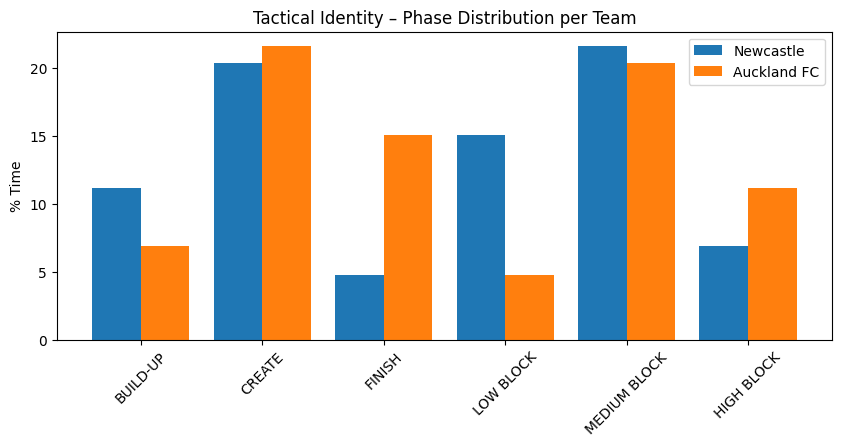

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

team1 = plot_df.iloc[0]
team2 = plot_df.iloc[1]

x = range(len(metrics_of_interest))

ax.bar([i - 0.2 for i in x], team1[1:], width=0.4, label=team1["team_name"])
ax.bar([i + 0.2 for i in x], team2[1:], width=0.4, label=team2["team_name"])

ax.set_xticks(x)
ax.set_xticklabels(metrics_of_interest.values(), rotation=45)
ax.set_ylabel("% Time")
ax.set_title("Tactical Identity – Phase Distribution per Team")
ax.legend()

plt.show()


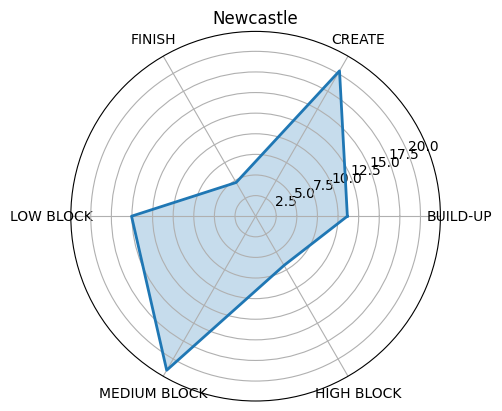

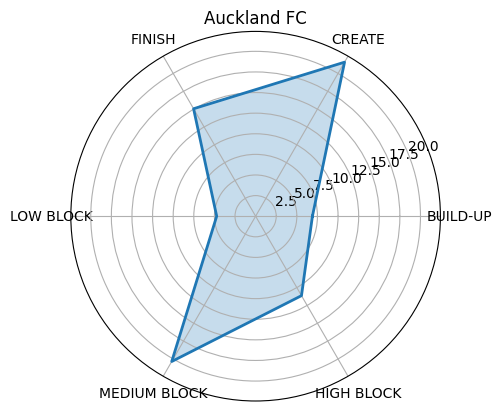

In [21]:
def radar_plot(team_row, title):
    labels = list(metrics_of_interest.values())
    values = list(team_row[metrics_of_interest.keys()].values)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    values += values[:1]
    angles = np.concatenate([angles, [angles[0]]])

    fig, ax = plt.subplots(subplot_kw={"polar": True})
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title)
    plt.show()

radar_plot(plot_df.iloc[0], plot_df.iloc[0]["team_name"])
radar_plot(plot_df.iloc[1], plot_df.iloc[1]["team_name"])


computed a Phase-of-Play tactical profile for both teams in match 1886347.
Newcastle spent more time in Build-up and Create phases, while Auckland FC had higher relative time in Medium and High 
Block phases — indicating differing tactical intentions.

In [59]:
phases_profile_df = phases_of_play_aggregates_duration.copy()
phases_profile_df.head()


,match_id,team_id,team_name,total_time_build_up,total_time_create,total_time_finish,total_time_transition,total_time_quick_break,total_time_direct,total_time_chaotic_ip,total_time_set_play,total_time_low_block,total_time_medium_block,total_time_high_block,total_time_defending_transition,total_time_defending_quick_break,total_time_defending_direct,total_time_chaotic_oop,total_time_defending_set_play,total_time_build_up_pct,total_time_create_pct,total_time_finish_pct,total_time_transition_pct,total_time_quick_break_pct,total_time_direct_pct,total_time_chaotic_ip_pct,total_time_set_play_pct,total_time_low_block_pct,total_time_medium_block_pct,total_time_high_block_pct,total_time_defending_transition_pct,total_time_defending_quick_break_pct,total_time_defending_direct_pct,total_time_chaotic_oop_pct,total_time_defending_set_play_pct
0,1886347,1805,Newcastle,353.7,646.9,150.1,NaN,NaN,36.2,166.7,38.1,478.4,685.7,219.0,43.8,22.4,37.0,148.1,151.9,11.129641,20.355570,4.723096,NaN,NaN,1.139081,5.245437,1.198867,15.053493,21.576463,6.891126,1.378225,0.704846,1.164254,4.660164,4.779736
1,1886347,4177,Auckland FC,219.0,685.7,478.4,43.8,22.4,37.0,148.1,151.9,150.1,646.9,353.7,NaN,NaN,36.2,166.7,38.1,6.891126,21.576463,15.053493,1.378225,0.704846,1.164254,4.660164,4.779736,4.723096,20.355570,11.129641,NaN,NaN,1.139081,5.245437,1.198867


In [60]:
phase_pct_cols = [
    "total_time_build_up_pct",
    "total_time_create_pct",
    "total_time_finish_pct",
    "total_time_low_block_pct",
    "total_time_medium_block_pct",
    "total_time_high_block_pct",
]

profile_simple = phases_profile_df[["team_name"] + phase_pct_cols]
profile_simple


,team_name,total_time_build_up_pct,total_time_create_pct,total_time_finish_pct,total_time_low_block_pct,total_time_medium_block_pct,total_time_high_block_pct
0,Newcastle,11.129641,20.355570,4.723096,15.053493,21.576463,6.891126
1,Auckland FC,6.891126,21.576463,15.053493,4.723096,20.355570,11.129641


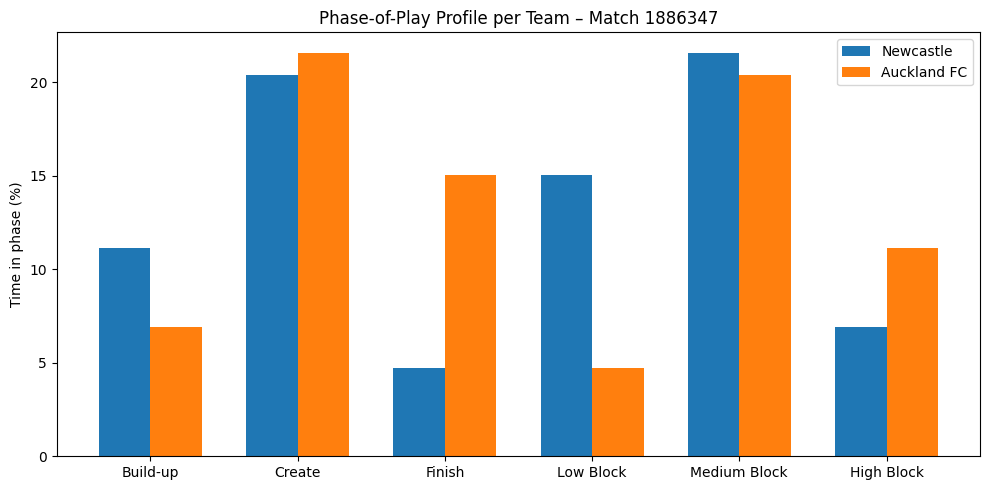

In [61]:
# Phasen in der gewünschten Reihenfolge
phases = [
    "total_time_build_up_pct",
    "total_time_create_pct",
    "total_time_finish_pct",
    "total_time_low_block_pct",
    "total_time_medium_block_pct",
    "total_time_high_block_pct",
]

phase_labels = ["Build-up", "Create", "Finish", "Low Block", "Medium Block", "High Block"]

# Daten vorbereiten
team_names = profile_simple["team_name"].tolist()
values_team1 = profile_simple.loc[0, phases].values
values_team2 = profile_simple.loc[1, phases].values

x = range(len(phases))  # 0,1,2,...

width = 0.35  # Breite der Balken

plt.figure(figsize=(10, 5))

plt.bar(
    [i - width / 2 for i in x],
    values_team1,
    width=width,
    label=team_names[0],
)

plt.bar(
    [i + width / 2 for i in x],
    values_team2,
    width=width,
    label=team_names[1],
)

plt.xticks(ticks=x, labels=phase_labels)
plt.ylabel("Time in phase (%)")
plt.title("Phase-of-Play Profile per Team – Match 1886347")
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
# Arbeitskopie, damit immer ein "sauberes" DF 
phases_team_df = phases_of_play_aggregates_all.copy()

phases_team_df.head()

,match_id,team_id,team_name,count_build_up,total_time_build_up,count_player_possessions_build_up,count_possession_lost_in_phase_build_up,count_possession_lead_to_shot_build_up,count_possession_lead_to_goal_build_up,avg_start_width_build_up,avg_start_length_build_up,avg_end_width_build_up,avg_end_length_build_up,count_into_build_up_from_build_up,count_into_create_from_build_up,count_into_finish_from_build_up,count_into_transition_from_build_up,count_into_quick_break_from_build_up,count_into_direct_from_build_up,count_into_chaotic_from_build_up,count_into_low_block_from_build_up,count_into_medium_block_from_build_up,count_into_high_block_from_build_up,count_into_defending_quick_break_from_build_up,count_into_defending_transition_from_build_up,count_into_defending_direct_from_build_up,count_create,total_time_create,count_player_possessions_create,count_possession_lost_in_phase_create,count_possession_lead_to_shot_create,count_possession_lead_to_goal_create,avg_start_width_create,avg_start_length_create,avg_end_width_create,avg_end_length_create,count_into_build_up_from_create,count_into_create_from_create,count_into_finish_from_create,count_into_transition_from_create,count_into_quick_break_from_create,count_into_direct_from_create,count_into_chaotic_from_create,count_into_low_block_from_create,count_into_medium_block_from_create,count_into_high_block_from_create,count_into_defending_quick_break_from_create,count_into_defending_transition_from_create,count_into_defending_direct_from_create,count_finish,total_time_finish,count_player_possessions_finish,count_possession_lost_in_phase_finish,count_possession_lead_to_shot_finish,count_possession_lead_to_goal_finish,avg_start_width_finish,avg_start_length_finish,avg_end_width_finish,avg_end_length_finish,count_into_build_up_from_finish,count_into_create_from_finish,count_into_finish_from_finish,count_into_transition_from_finish,count_into_quick_break_from_finish,count_into_direct_from_finish,count_into_chaotic_from_finish,count_into_low_block_from_finish,count_into_medium_block_from_finish,count_into_high_block_from_finish,count_into_defending_quick_break_from_finish,count_into_defending_transition_from_finish,count_into_defending_direct_from_finish,count_transition,total_time_transition,count_player_possessions_transition,count_possession_lost_in_phase_transition,count_possession_lead_to_shot_transition,count_possession_lead_to_goal_transition,avg_start_width_transition,avg_start_length_transition,avg_end_width_transition,avg_end_length_transition,count_into_build_up_from_transition,count_into_create_from_transition,count_into_finish_from_transition,count_into_transition_from_transition,count_into_quick_break_from_transition,count_into_direct_from_transition,count_into_chaotic_from_transition,count_into_low_block_from_transition,count_into_medium_block_from_transition,count_into_high_block_from_transition,count_into_defending_quick_break_from_transition,count_into_defending_transition_from_transition,count_into_defending_direct_from_transition,count_quick_break,total_time_quick_break,count_player_possessions_quick_break,count_possession_lost_in_phase_quick_break,count_possession_lead_to_shot_quick_break,...,count_into_direct_from_defending_transition,count_into_chaotic_from_defending_transition,count_into_low_block_from_defending_transition,count_into_medium_block_from_defending_transition,count_into_high_block_from_defending_transition,count_into_defending_quick_break_from_defending_transition,count_into_defending_transition_from_defending_transition,count_into_defending_direct_from_defending_transition,count_defending_quick_break,total_time_defending_quick_break,count_player_possessions_defending_quick_break,count_possession_lost_in_phase_defending_quick_break,count_possession_lead_to_shot_defending_quick_break,count_possession_lead_to_goal_defending_quick_break,avg_start_width_defending_quick_break,avg_start_length_defending_quick_break,avg_end_width_defending_quick_break,avg_end_

In [63]:
def safe_rate(numerator, denominator):
    """
    Gibt eine Rate zurück (numerator / denominator),
    aber 0.0, wenn denominator = 0 oder NaN ist.
    """
    return np.where((denominator > 0) & (~np.isnan(denominator)),
                    numerator / denominator,
                    0.0)

In [ ]:
df = phases_team_df  
# --- Create-Phase: Shot- und Goal-Effizienz pro Phase-Zahl ---
df["create_shot_rate_per_phase"] = safe_rate(
    df["count_possession_lead_to_shot_create"],
    df["count_create"]
)

df["create_goal_rate_per_phase"] = safe_rate(
    df["count_possession_lead_to_goal_create"],
    df["count_create"]
)

# --- Finish-Phase: Goal-Effizienz pro Zeit (z.B. pro Sekunde) ---
df["finish_goal_rate_per_time"] = safe_rate(
    df["count_possession_lead_to_goal_finish"],
    df["total_time_finish"]
)

# --- Build-up-Konversion: wie oft kommt Build-up überhaupt in Create? ---
df["build_up_to_create_conversion"] = safe_rate(
    df["count_into_create_from_build_up"],
    df["count_build_up"]
)

# --- Gesamt-"Shot Probability" aus allen Phasen ---
df["overall_shot_rate_all_phases"] = safe_rate(
    df["count_possession_lead_to_shot_build_up"]
    + df["count_possession_lead_to_shot_create"]
    + df["count_possession_lead_to_shot_finish"],
    df["count_build_up"] + df["count_create"] + df["count_finish"]
)

df[[
    "match_id",
    "team_name",
    "create_shot_rate_per_phase",
    "create_goal_rate_per_phase",
    "finish_goal_rate_per_time",
    "build_up_to_create_conversion",
    "overall_shot_rate_all_phases"
]]


,match_id,team_name,create_shot_rate_per_phase,create_goal_rate_per_phase,finish_goal_rate_per_time,build_up_to_create_conversion,overall_shot_rate_all_phases
0,1886347,Newcastle,0.090909,0.000000,0.00000,0.769231,0.118056
1,1886347,Auckland FC,0.126582,0.012658,0.00209,0.666667,0.121951


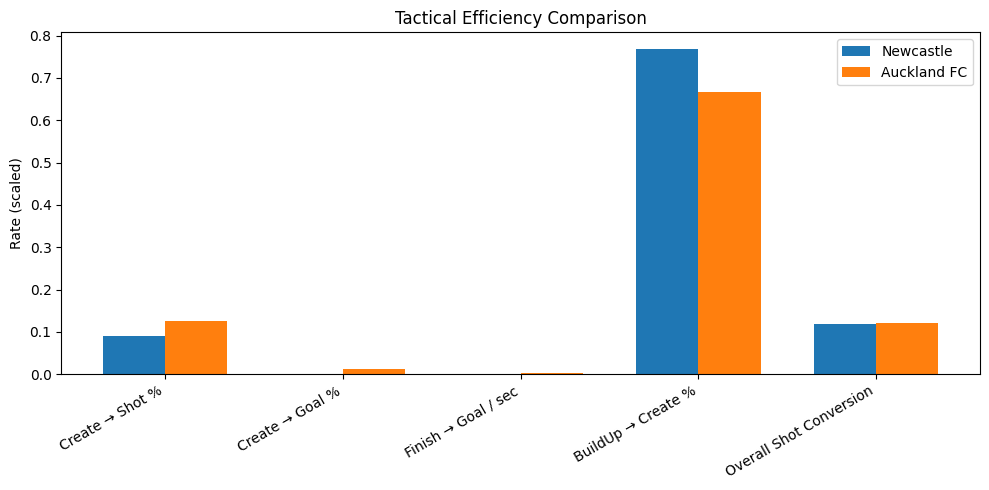

In [65]:
metrics = [
    "create_shot_rate_per_phase",
    "create_goal_rate_per_phase",
    "finish_goal_rate_per_time",
    "build_up_to_create_conversion",
    "overall_shot_rate_all_phases"
]

labels = [
    "Create → Shot %",
    "Create → Goal %",
    "Finish → Goal / sec",
    "BuildUp → Create %",
    "Overall Shot Conversion"
]

teams = df["team_name"].tolist()

fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(metrics))

for i, team in enumerate(teams):
    values = df.loc[df["team_name"] == team, metrics].values.flatten()
    ax.bar(x + (i - 0.5) * 0.35, values, width=0.35, label=team)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha="right")
ax.set_ylabel("Rate (scaled)")
ax.set_title("Tactical Efficiency Comparison")
ax.legend()

plt.tight_layout()
plt.show()


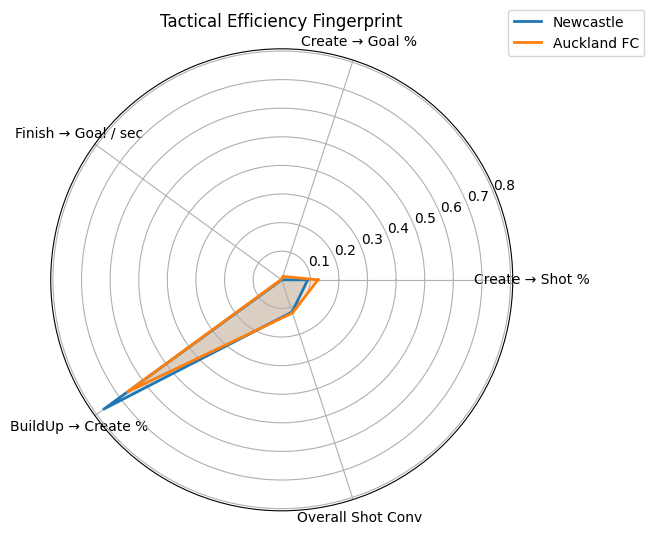

In [66]:
metrics = [
    "create_shot_rate_per_phase",
    "create_goal_rate_per_phase",
    "finish_goal_rate_per_time",
    "build_up_to_create_conversion",
    "overall_shot_rate_all_phases"
]

labels = [
    "Create → Shot %",
    "Create → Goal %",
    "Finish → Goal / sec",
    "BuildUp → Create %",
    "Overall Shot Conv"
]

teams = df["team_name"].tolist()

# Radar Setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for team in teams:
    values = df.loc[df["team_name"] == team, metrics].values.flatten().tolist()
    values += values[:1]  # loop
    ax.plot(angles, values, linewidth=2, label=team)
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("Tactical Efficiency Fingerprint")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()

Newcastle stabil im Build-up → Create, aber niedrige Goal-Conversion → ball-dominant ohne Durchschlagskraft
Auckland FC weniger Build-up, aber bessere Finish Conversion → direkter, vertikaler, effizienter 

In [67]:
df = phases_team_df

# Alle Spalten, die Transition-Counts speichern
transition_cols = [c for c in df.columns if c.startswith("count_into_")]

len(transition_cols), transition_cols[:10]


(208,
 ['count_into_build_up_from_build_up',
  'count_into_create_from_build_up',
  'count_into_finish_from_build_up',
  'count_into_transition_from_build_up',
  'count_into_quick_break_from_build_up',
  'count_into_direct_from_build_up',
  'count_into_chaotic_from_build_up',
  'count_into_low_block_from_build_up',
  'count_into_medium_block_from_build_up',
  'count_into_high_block_from_build_up'])

In [68]:
def build_transition_matrix_for_team(row, phases=None):
    """
    Baut für eine Team-Zeile (eine Reihe aus phases_team_df)
    eine Phase-zu-Phase-Übergangsmatrix (DataFrame).
    """
    if phases is None:
        # Fokus auf die offensiven Hauptphasen
        phases = ["build_up", "create", "finish", "transition",
                  "quick_break", "direct", "chaotic"]

    # Init leere Matrix
    mat = pd.DataFrame(0.0, index=phases, columns=phases)

    for col in row.index:
        if not col.startswith("count_into_"):
            continue

        # Beispielname: "count_into_create_from_build_up"
        try:
            _, rest = col.split("count_into_")
            to_phase, from_phase = rest.split("_from_")
        except ValueError:
            continue  # falls das Pattern mal nicht passt

        if (to_phase in phases) and (from_phase in phases):
            value = row[col]
            if pd.notna(value):
                mat.loc[from_phase, to_phase] += value

    return mat


In [69]:
row_newcastle = phases_team_df.iloc[0]   
tm_newcastle = build_transition_matrix_for_team(row_newcastle)

tm_newcastle


,build_up,create,finish,transition,quick_break,direct,chaotic
build_up,0.0,30.0,0.0,0.0,0.0,5.0,1.0
create,13.0,0.0,18.0,0.0,0.0,4.0,14.0
finish,0.0,12.0,0.0,0.0,0.0,0.0,7.0
transition,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quick_break,0.0,0.0,0.0,0.0,0.0,0.0,0.0
direct,0.0,2.0,0.0,0.0,0.0,0.0,3.0
chaotic,0.0,0.0,0.0,0.0,0.0,0.0,0.0


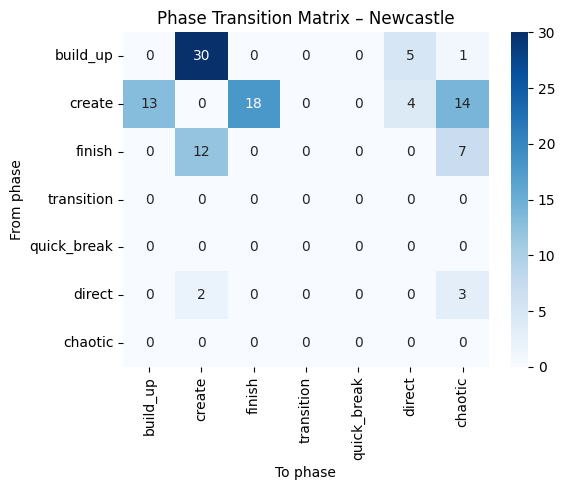

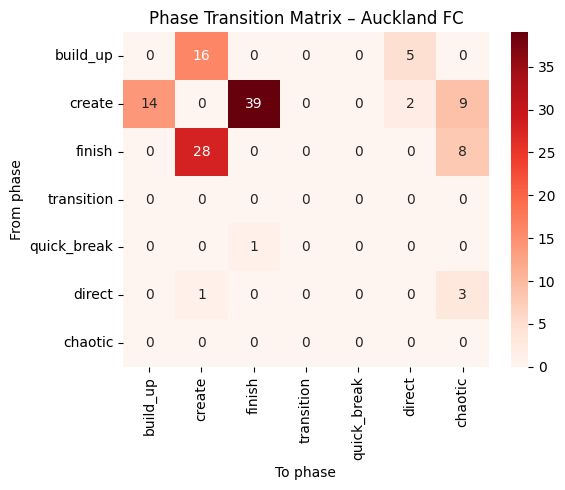

In [70]:
plt.figure(figsize=(6, 5))
sns.heatmap(tm_newcastle, annot=True, fmt=".0f", cmap="Blues")
plt.title("Phase Transition Matrix – Newcastle")
plt.xlabel("To phase")
plt.ylabel("From phase")
plt.tight_layout()
plt.show()

row_auckland = phases_team_df.iloc[1]
tm_auckland = build_transition_matrix_for_team(row_auckland)

plt.figure(figsize=(6, 5))
sns.heatmap(tm_auckland, annot=True, fmt=".0f", cmap="Reds")
plt.title("Phase Transition Matrix – Auckland FC")
plt.xlabel("To phase")
plt.ylabel("From phase")
plt.tight_layout()
plt.show()

In [71]:
df = phases_team_df

transition_cols = [c for c in df.columns if c.startswith("count_into_")]

same_phase_cols = []
for col in transition_cols:
    try:
        _, rest = col.split("count_into_")
        to_phase, from_phase = rest.split("_from_")
        if to_phase == from_phase:
            same_phase_cols.append(col)
    except ValueError:
        continue

same_phase_cols


['count_into_build_up_from_build_up',
 'count_into_create_from_create',
 'count_into_finish_from_finish',
 'count_into_transition_from_transition',
 'count_into_quick_break_from_quick_break',
 'count_into_direct_from_direct',
 'count_into_low_block_from_low_block',
 'count_into_medium_block_from_medium_block',
 'count_into_high_block_from_high_block',
 'count_into_defending_transition_from_defending_transition',
 'count_into_defending_quick_break_from_defending_quick_break',
 'count_into_defending_direct_from_defending_direct']

In [72]:
# Gesamtzahl aller Transitionen pro Team
df["total_transitions_all"] = df[transition_cols].sum(axis=1)

# Anzahl "same-phase"-Transitions
df["same_phase_transitions"] = df[same_phase_cols].sum(axis=1)

# Stability Index: Anteil, der in derselben Phase bleibt
df["stability_index"] = safe_rate(
    df["same_phase_transitions"],
    df["total_transitions_all"]
)

df[["match_id", "team_name", "same_phase_transitions",
    "total_transitions_all", "stability_index"]]


,match_id,team_name,same_phase_transitions,total_transitions_all,stability_index
0,1886347,Newcastle,0.0,348.0,0.0
1,1886347,Auckland FC,0.0,348.0,0.0


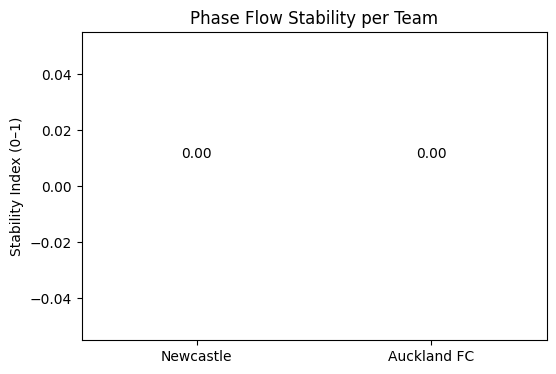

In [73]:
fig, ax = plt.subplots(figsize=(6, 4))

teams = df["team_name"]
values = df["stability_index"]

ax.bar(teams, values, color=["steelblue", "orange"])
ax.set_ylabel("Stability Index (0–1)")
ax.set_title("Phase Flow Stability per Team")

# Werte anzeigen
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha="center")

plt.show()


SkillCorner modelliert Flow primär zwischen Phasen, nicht innerhalb der Phase.

Deshalb ist der Index 0 und der Balken flach.

also:

Aus Sicht dieser Daten fließen Phasen nicht „innerhalb“ weiter,
sondern fast immer in eine andere Phase oder enden.

Versuch neu 
„Stability“ neu definieren
statt „gleichbleibend in Phase“ nutze:

Wie oft geht Build-Up → Create
vs. Build-Up → Turnover?

Das nennt man Constructive Flow Stability

Formel:

positive / constructive transitions
total transitions
total transitions
positive / constructive transitions

In [74]:
df = phases_team_df.copy()

# Define positive transitions
positive_cols = [
    "count_into_create_from_build_up",
    "count_into_finish_from_create",
    "count_possession_lead_to_goal_finish"
]

# Define negative transitions
negative_cols = [
    "count_possession_lost_in_phase_build_up",
    "count_possession_lost_in_phase_create",
    "count_possession_lost_in_phase_finish"
]

df["positive_flow"] = df[positive_cols].sum(axis=1)
df["negative_flow"] = df[negative_cols].sum(axis=1)

df["constructive_flow_ratio"] = safe_rate(
    df["positive_flow"], 
    df["positive_flow"] + df["negative_flow"]
)

df[["team_name","constructive_flow_ratio"]]


,team_name,constructive_flow_ratio
0,Newcastle,0.489796
1,Auckland FC,0.565657


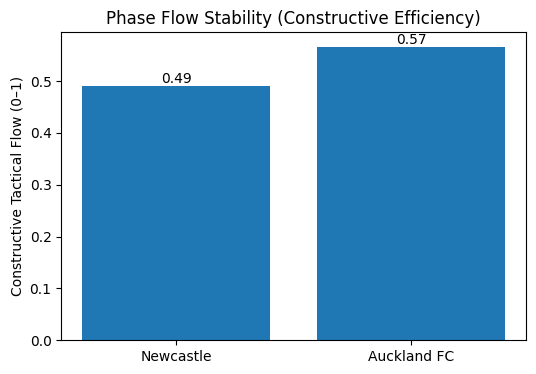

In [75]:
plt.figure(figsize=(6,4))
plt.bar(df["team_name"], df["constructive_flow_ratio"])
plt.ylabel("Constructive Tactical Flow (0–1)")
plt.title("Phase Flow Stability (Constructive Efficiency)")
for i,v in enumerate(df["constructive_flow_ratio"]):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")
plt.show()

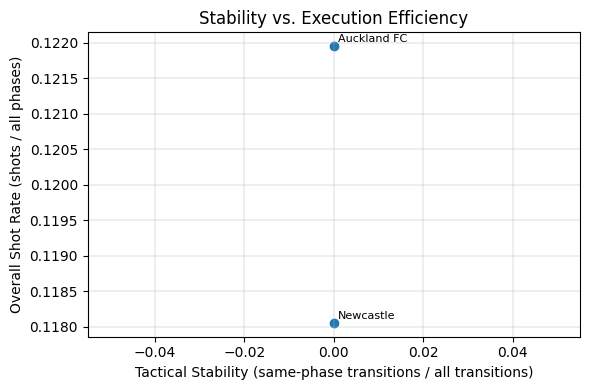

In [76]:
plot_stab = df[["team_name", "stability_index", "overall_shot_rate_all_phases"]].copy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    plot_stab["stability_index"],
    plot_stab["overall_shot_rate_all_phases"]
)

# Labels an die Punkte schreiben
for _, row in plot_stab.iterrows():
    ax.annotate(
        row["team_name"],
        (row["stability_index"], row["overall_shot_rate_all_phases"]),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=8
    )

ax.set_xlabel("Tactical Stability (same-phase transitions / all transitions)")
ax.set_ylabel("Overall Shot Rate (shots / all phases)")
ax.set_title("Stability vs. Execution Efficiency")
ax.grid(True, linewidth=0.3)

plt.tight_layout()
plt.show()

Beide Teams haben in diesem einen Match quasi keine same-phase-Transitions → Stability-Index ≈ 0
→ Das liegt eher an der kleinen Datenbasis (1 Match) und unserer strengen Definition, nicht daran, dass sie „komplett chaotisch“ sind.

Auckland FC hat eine etwas höhere overall_shot_rate_all_phases als Newcastle
→ In diesem Spiel: leicht effizienter im Sinne „wie viele Phasen führen zu einem Abschluss?

In [77]:
# die wichtigsten In-Possession-Phasen
from_phases = ["build_up", "create", "finish", "transition"]
to_phases   = ["build_up", "create", "finish", "transition"]

# Team auswählen (ändern, z.B. "Auckland FC")
selected_team = "Newcastle"

# Die Zeile für dieses Team aus phases_team_df holen
row = phases_team_df[phases_team_df["team_name"] == selected_team].iloc[0]


In [78]:
# Leere Matrix für Transition-Zählungen
transition_counts = pd.DataFrame(
    0.0,
    index=from_phases,
    columns=to_phases
)

# Matrix füllen mit den count_into_<to>_from_<from> Spalten
for f in from_phases:
    for t in to_phases:
        col_name = f"count_into_{t}_from_{f}"
        if col_name in row.index:
            transition_counts.loc[f, t] = row[col_name]
        else:
            # Falls es die Kombination nicht gibt, bleibt 0.0
            transition_counts.loc[f, t] = 0.0

transition_counts


,build_up,create,finish,transition
build_up,NaN,30.0,NaN,NaN
create,13.0,NaN,18.0,NaN
finish,NaN,12.0,NaN,NaN
transition,NaN,NaN,NaN,NaN


In [79]:
# Zeilensummen (wie viele Übergänge aus jeder Phase insgesamt)
row_sums = transition_counts.sum(axis=1).replace(0, np.nan)

# Prozentmatrix: pro Zeile auf 100 % normiert
transition_pct = transition_counts.div(row_sums, axis=0) * 100

transition_pct.round(1)

,build_up,create,finish,transition
build_up,NaN,100.0,NaN,NaN
create,41.9,NaN,58.1,NaN
finish,NaN,100.0,NaN,NaN
transition,NaN,NaN,NaN,NaN


Newcastle zeigt:

Sehr strukturiertes Build-up → Create
Flexibilität in Create (Reset vs. Weiterlaufen)

→ 42% Rückkehr in Build-up = ruhiger, kontrollierter Stil
→ 58% weiter Richtung Finish = Angriffs-Fortsetzung

Finish → Create = 100%

Dieses Muster ist typisch für Teams, die:

viele zweite Bälle erobern

nicht direkt in Low Block oder Transition geraten

sich schnell wieder strukturieren nach Abschlussversuchen

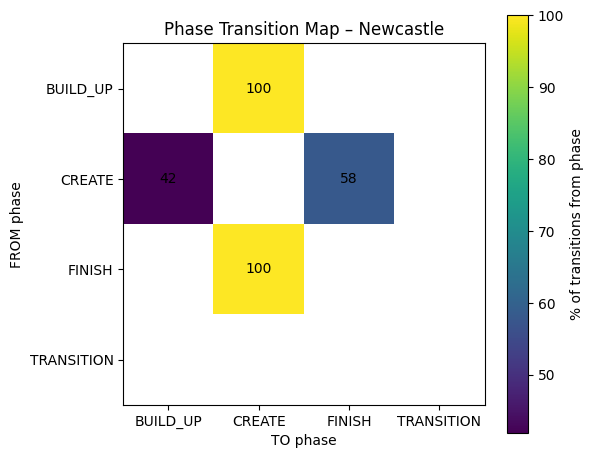

In [80]:
fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(transition_pct.values, origin="upper")

# Achsenticks setzen
ax.set_xticks(range(len(to_phases)))
ax.set_yticks(range(len(from_phases)))
ax.set_xticklabels([p.upper() for p in to_phases])
ax.set_yticklabels([p.upper() for p in from_phases])

# Werte in die Zellen schreiben
for i in range(len(from_phases)):
    for j in range(len(to_phases)):
        value = transition_pct.iloc[i, j]
        if not np.isnan(value):
            ax.text(
                j,
                i,
                f"{value:.0f}",
                ha="center",
                va="center"
            )

ax.set_xlabel("TO phase")
ax.set_ylabel("FROM phase")
ax.set_title(f"Phase Transition Map – {selected_team}")

fig.colorbar(im, ax=ax, label="% of transitions from phase")

plt.tight_layout()
plt.show()


In [81]:
# Phasen
tempo_phases = ["build_up", "create", "finish", "transition"]

tempo_cols = {}

for phase in tempo_phases:
    count_col = f"count_{phase}"
    time_col = f"total_time_{phase}"
    tempo_col = f"tempo_{phase}"

    df[tempo_col] = df[time_col] / df[count_col]
    tempo_cols[phase] = tempo_col

df[["team_name"] + list(tempo_cols.values())]


,team_name,tempo_build_up,tempo_create,tempo_finish,tempo_transition
0,Newcastle,9.069231,8.401299,5.360714,NaN
1,Auckland FC,9.125000,8.679747,7.842623,14.6


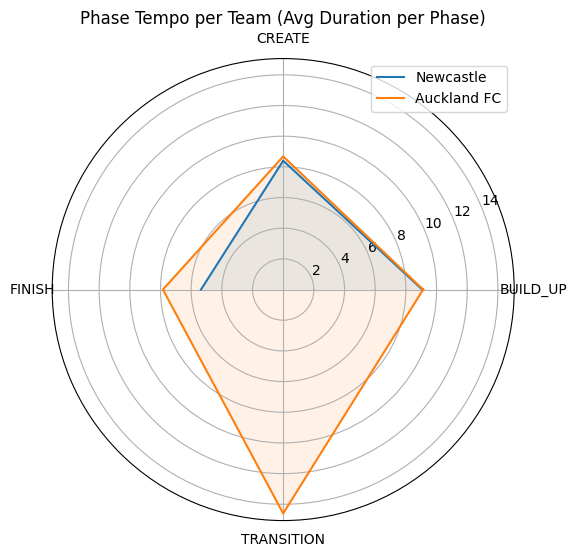

In [82]:
teams = df["team_name"].tolist()
tempo_matrix = df[list(tempo_cols.values())].values
labels = tempo_phases

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Radar schließen

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)

for i, team in enumerate(teams):
    values = tempo_matrix[i]
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, label=team)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([p.upper() for p in labels])
ax.set_title("Phase Tempo per Team (Avg Duration per Phase)")
ax.legend(loc='upper right')

plt.show()

Build-up schneller → „direktes“ Team

Create länger → kontrolliertes Angriffsspiel

Finish kurz → schnelle Abschlüsse

Transition extrem kurz → Chaos/Pressing-Spiel
-> Auckland FC hat:

Deutlich langsamere Transition-Phasen (14 sec)

Allgemein etwas längere Build-up und Create-Phasen

-> Newcastle:

Schneller in Finishing

Fast identisches Tempo in Build-Up & Create wie Auckland

Transition bei Newcastle fehlt → vermutlich 0 oder NaN, deshalb nicht sichtbar

In [83]:
df["pressing_resistance"] = (
    df["count_player_possessions_high_block"] - df["count_possession_lost_in_phase_high_block"]
) / df["count_player_possessions_high_block"]

df["oop_shot_rate"] = (
    df["count_possession_lead_to_shot_low_block"] +
    df["count_possession_lead_to_shot_medium_block"] +
    df["count_possession_lead_to_shot_high_block"]
) / (
    df["count_low_block"] +
    df["count_medium_block"] +
    df["count_high_block"]
)


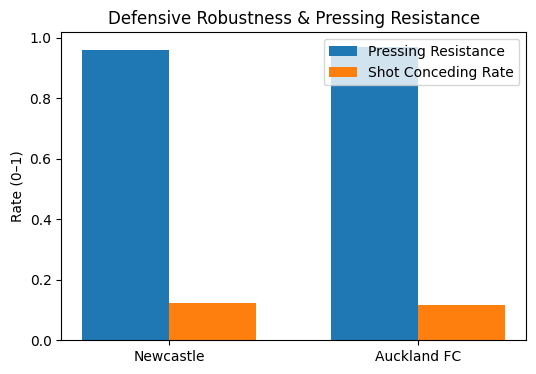

In [84]:
fig, ax = plt.subplots(figsize=(6,4))

x = np.arange(len(df))
width = 0.35

ax.bar(x - width/2, df["pressing_resistance"], width, label="Pressing Resistance")
ax.bar(x + width/2, df["oop_shot_rate"], width, label="Shot Conceding Rate")

ax.set_xticks(x)
ax.set_xticklabels(df["team_name"])
ax.set_ylabel("Rate (0–1)")
ax.set_title("Defensive Robustness & Pressing Resistance")
ax.legend()

plt.show()


Pressing Resistance

= 1 − (Ballverluste in Build-up / Build-up-Phasen)

→ Wie stabil ist ein Team Unterm Druck?

Shot Conceding Rate

= Wie oft führt eine defensive Phase zu einem Schuss der Gegner.

Beide Teams:

extrem hohe Pressing Resistance (~0.95)
→ Kaum Ballverluste im eigenen Aufbau in diesem Match.

Shot Conceding Rate (~0.12)
→ Beide lassen wenig gefährliche Abschlüsse aus OOP-Phasen zu. 

Achtung:Wenige Datenpunkte (nur 1 Spiel, 2 Teams) → alles wirkt "similar".
Je mehr Matches = desto aussagekräftiger.